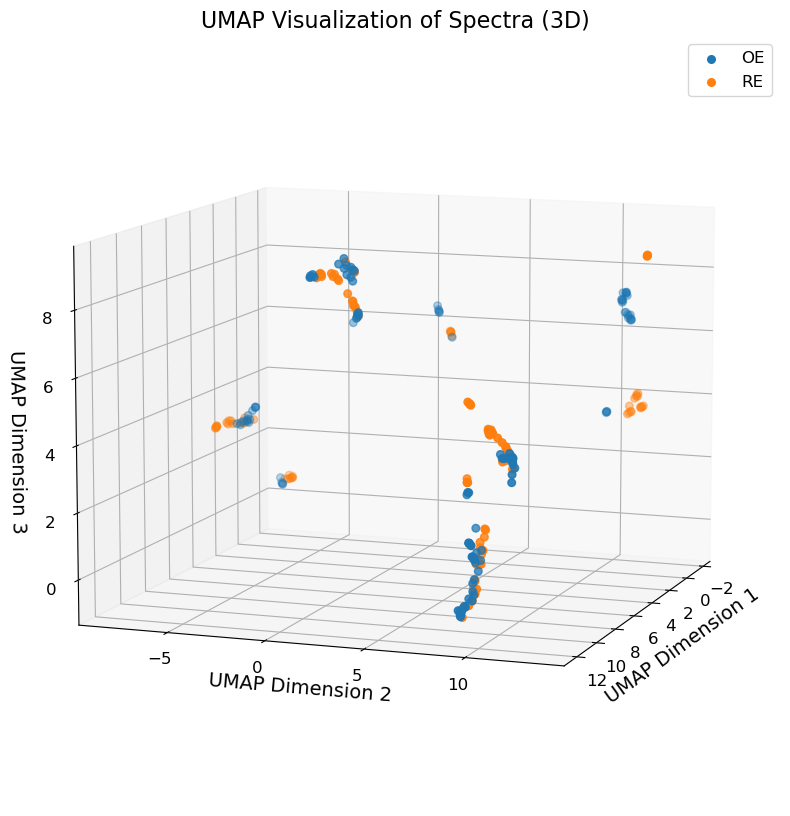

In [1]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Beispiel: Pfad zum Ordner mit den normalisierten Spektren
folder_path = "/Users/leokavallaris/FTIR ATR/Spectra OE RE/101"

# Ziel-Länge der Spektren
target_length = 4600

spectra = []
labels = []  # RE oder OE
for file_name in os.listdir(folder_path):
    if file_name.endswith("_cut.csv"):
        # Lese die normalisierten Spektraldaten ein
        file_path = os.path.join(folder_path, file_name)
        normalized_absorbance = np.loadtxt(file_path, delimiter=',')
        # Zuschnitt oder Padding auf die Ziel-Länge
        if len(normalized_absorbance) > target_length:
            normalized_absorbance = normalized_absorbance[:target_length]
        elif len(normalized_absorbance) < target_length:
            # Padding mit Nullen, falls erforderlich
            normalized_absorbance = np.pad(normalized_absorbance, (0, target_length - len(normalized_absorbance)), mode='constant')
        spectra.append(normalized_absorbance)
        # Bestimme die Klasse (RE oder OE) anhand des Dateinamens
        if "RE" in file_name:
            labels.append("RE")
        elif "OE" in file_name:
            labels.append("OE")

# Konvertiere die Listen von Spektren und Labels in numpy-Arrays
spectra = np.array(spectra)
labels = np.array(labels)

# Skalieren der Daten
scaler = StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)

# Anwenden von UMAP mit drei Dimensionen
umap = UMAP(n_neighbors=10, min_dist=0.1, n_components=3)
umap_embeddings = umap.fit_transform(scaled_spectra)

# Erstelle den Scatterplot und färbe die Punkte entsprechend ihrer Klasse
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(labels):
    indices = np.where(labels == label)
    ax.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1], umap_embeddings[indices, 2], label=label, s=30)
ax.set_xlabel('UMAP Dimension 1', fontsize=14)
ax.set_ylabel('UMAP Dimension 2', fontsize=14)
ax.set_zlabel('UMAP Dimension 3', fontsize=14)
ax.set_title('UMAP Visualization of Spectra (3D)', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.zaxis.set_tick_params(labelsize=12)


# Passen Sie die Ansicht des 3D-Plots an, um die Beschriftungen vollständig sichtbar zu machen
ax.view_init(elev=10, azim=20)

plt.show()